In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SALib
from SALib.plotting import bar
import seaborn as sns
# read Sobol' sensitivity indices as dataframe
from settings import SOBOL_DATA_DIR, FIGURE_DIR
from utils.Sobol_G_setting import set_sobol_g_func
from pandas.core.common import flatten
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

## Plot Sobol' SA with dummy parameter included

<Figure size 576x432 with 0 Axes>

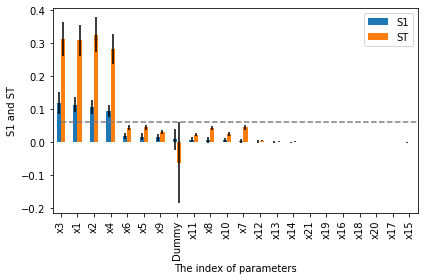

In [4]:
df = pd.read_csv(f'../output/sobol/Sobol_indices.csv', index_col = 'Unnamed: 0')
a, x, x_bounds, x_names, len_params, problem = set_sobol_g_func()

df_plot = pd.DataFrame()
df_plot.loc[:, 'S1'] = df[df.Type == 'S1']['result_5000'].values
df_plot.loc[:, 'S1_conf'] = df[df.Type == 'S1_conf']['result_5000'].values
df_plot.loc[:, 'ST'] = df[df.Type == 'ST']['result_5000'].values
df_plot.loc[:, 'ST_conf'] = df[df.Type == 'ST_conf']['result_5000'].values
threshold = df_plot.loc[21, 'ST'] + df_plot.loc[21, 'ST_conf']

df_plot.index = [* problem['names'], 'Dummy']
df_plot.sort_values(by='S1', ascending=False, inplace=True)
fig = plt.figure(figsize = (8, 6))
ax = bar.plot(df_plot)
# ax.set_xticklabels([* problem['names'], 'Dummy'])
ax.set_xlabel('The index of parameters')
ax.set_ylabel('S1 and ST')
plt.tight_layout()
plt.hlines(threshold, xmin=0, xmax=22, colors = 'grey', linestyle='--')
plt.savefig(f'../output/sobol/Sobol_dummy.png', format = 'png', dpi = 300)

## Plot the adaptive evaluation

In [7]:
df[fn].index

Int64Index([0, 1, 2, 3], dtype='int64')

In [39]:
from settings import *
df = {}
filename = ['fix_6', 'fix_9', 'fix_10'] #'fix_9', 'fix_17','fix_1', , 'fix_21', 'fix_10',
fpath = '../output/replicates/morris/sobol_horizontal/'

for fn in filename:
    df[fn] = pd.read_csv(f'{fpath}{fn}/mean_estimation.csv', index_col = 'Unnamed: 0').iloc[0:]
    df[fn].index = df[fn].index.astype('int')
    df[fn].index = (df[fn].index + 1) * 10

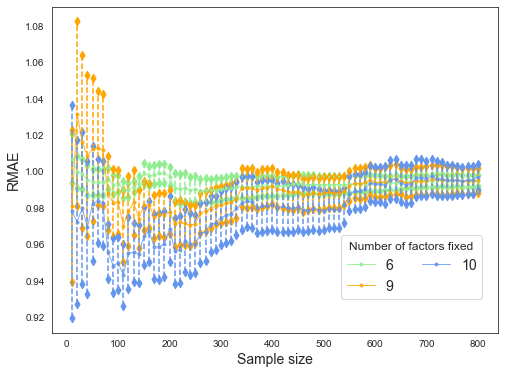

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
fs = 12
sns.set_style('white')
plt.rcParams['legend.title_fontsize'] = 12
lgd = [ii.split('_')[1] for ii in filename]
METRIC_NAME = [METRIC_NAME[1]]
metrics = [fn for fn in METRIC_NAME if not '_' in fn ]
colors = ['lightgreen', 'orange', 'cornflowerblue' ]
for ii in range(len(metrics)):
    metric = metrics[ii]
    k = 0
    for fn in filename:  
        df_plot = df[fn]
        lower = df_plot.loc[:, f'{metric}_mean'] - df_plot.loc[:, f'{metric}_std']
        upper = df_plot.loc[:, f'{metric}_mean'] + df_plot.loc[:, f'{metric}_std']
        # logy = True if ii == 0 else False
        ax = df_plot.loc[:, metric + '_mean'].plot(kind='line', marker='o', linewidth=1, style='-', ms=3, ax = axes, alpha=0.8, logy=False, color=colors[k])
        ax.scatter(df_plot.index, lower, marker = 'd', color= colors[k])
        ax.scatter(df_plot.index, upper, marker = 'd', color=colors[k])
        ax.vlines(df_plot.index, lower, upper, linestyle = '--', color=colors[k])
        k += 1
        # ax.hlines(0.06, df_plot.index[0], df_plot.index[-1], linestyle = '--')   
    ax.set_xlabel('Sample size', fontsize=14);
    ax.set_ylabel('RMAE', fontsize = 14);
    ax.xaxis.set_major_locator(MultipleLocator(100))
    # plt.setp(ax.get_xticklabels(), fontsize=12)
    # plt.setp(ax.get_yticklabels(), fontsize=12)
    ax.legend(lgd, title='Number of factors fixed', fontsize = 14, ncol=2, bbox_to_anchor=(0.98, 0.32))
# plt.savefig('../output/replicates/figure/figure4_2.tif', format = 'tif', dpi = 400)


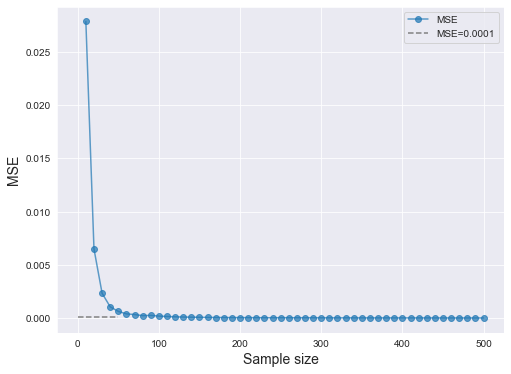

In [94]:
# Plot the MSE of the mean using variance and the sample size
sns.set_style('darkgrid')
ax = mse.iloc[:50].plot(legend=False, figsize = (8, 6), marker = 'o', alpha = 0.7)
ax.set_xlabel('Sample size', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
hlines_value = 0.0001
plt.hlines(hlines_value, xmin=0, xmax=50, colors='grey', linestyles='--')
ax.legend(['MSE', f'MSE={hlines_value}'])
# plt.savefig('../output/figure/mse_lhs.png', format = 'png', dpi = 300)

## Plot Figure 7 

In [184]:
from settings import *
df = {}
filename = ['fix_6', 'fix_9', 'fix_10', 'fix_13', 'fix_17']
fpath = '../output/replicates/morris/sobol_adaptive/'
for fn in filename:
    df[fn] = pd.read_csv(f'{fpath}{fn}/std_estimation.csv', index_col = 'Unnamed: 0').iloc[50]
df_metric = pd.DataFrame.from_dict(df, orient = 'index')
new_index = [ind.split('_')[1] for ind in list(df_metric.index)]
df_metric.index = new_index
# df_metric

In [185]:
# obtain relative bias    
cols = df_metric.columns
df_metric.fillna(value=0.0, inplace=True)
df_metric['ppmc_mean'] = df_metric['ppmc_mean'].apply(lambda x: 1 - x)
df_metric['var_mean'] = df_metric['var_mean'].apply(lambda x: np.abs(1 - x))

# drop the first row due to RMAE > 0.40
cols = df_metric.columns
yerror = [df_metric.loc[:, col].values for col in cols[-3:]]
x = df_metric.index
# df_metric.index = ([str(21 - i) for i in x])


In [186]:
# import the analytic variance 
fvariance = np.loadtxt('../data/variance_frac.txt')
# total_variance = 2.755
index_fix = np.array([[20, 17, 19, 15, 16, 18], [14, 12, 13], 
                    [11], [9, 10, 8], [7, 6, 5, 4], [2, 3, 0, 1]])
variance_frac = fvariance[[len(list(flatten(index_fix[0:i+1])))-1 for i in range(index_fix.size-1)]] / 100
variance_frac = np.append(variance_frac, fvariance[-1])
variance_frac = variance_frac[[0, 1, 2, 3, 4]]

Text(0.1, 0.08, '6% (Threshold)')

<Figure size 432x360 with 0 Axes>

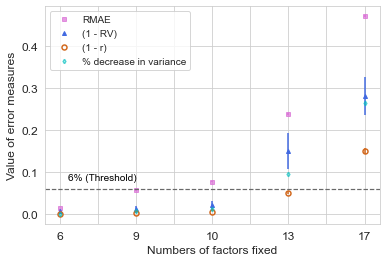

In [187]:

sns.set_style('whitegrid')
fig = plt.figure(figsize=(6, 5))
# form x label
num_in_groups = []
conf_names = [col for col in METRIC_NAME if '_conf' in col]
colors = ['orchid', 'royalblue','chocolate']
ax = df_metric[cols[:3]].plot(kind='line', yerr=yerror, linestyle='', color=colors)

x = df_metric.index
x_ticklabels = ['{}{}{}{}'.format(i+1, ' (', x[i], ')') for i in range(len(x))]

ax.plot(x, df_metric[METRIC_NAME[0]+'_mean'], 's', color=colors[0], ms=4, alpha=0.7, label='RMAE')
ax.plot(x, df_metric[METRIC_NAME[1]+'_mean'], '^', color=colors[1], ms=4, label='RV')
ax.plot(x, df_metric[METRIC_NAME[2]+'_mean'], 'o', ms=5, markerfacecolor='none',label='PPMC',
        markeredgecolor=colors[2], markeredgewidth=1.5)
          
ax.plot(x, variance_frac, 'd', ms=3, markerfacecolor='none',label='First-order variance',
        markeredgecolor='c', markeredgewidth=1.5, alpha=0.7)            
                                                                  
ax.axhline(y=0.06, xmin=0, xmax=6, linestyle='--', linewidth=1.2, color='dimgrey')
ax.tick_params(axis='both', labelsize=12)

ax.set_xlabel('Numbers of factors fixed', fontsize=12)
ax.set_ylabel('Value of error measures', fontsize=12)
# ax.set_ylim(-0.03, 0.5)
# ax.set_xlim(0.85, 7.15)

ax.legend(['RMAE', '(1 - RV)', '(1 - r)', '% decrease in variance'], loc='upper left', fontsize=10)
ax.text(0.1, 0.08, '6% (Threshold)', fontsize=10, color='k')
# plt.savefig('{}{}{}'.format('../output/reuse_sample/figure/', 'fig7_variance_fix', '.png'), dpi=300, format='png')

## Figure 7

In [14]:
"""Create figure 7 for paper."""
from settings import *

# plot for figure type I
f_dir = ['../output/reuse_sample/morris/compare/'+'0.25/',
         '../output/reuse_sample/sobol/compare/'+'0.25/']
f_names = ['mae', 'mae_lower','mae_upper']
def f_read(filename):
    df = pd.read_csv(filename)
    df.drop(columns = 'Unnamed: 0', inplace=True)
    df = df.reindex(index=df.index[::-1]).reset_index(drop=True)
    return df

<Figure size 720x432 with 0 Axes>

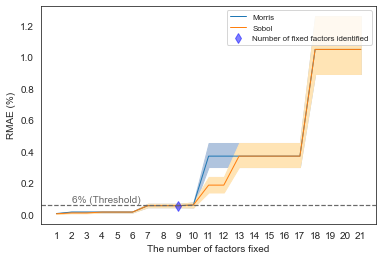

In [15]:


sample_size = ['result_80', 'result_800']
f_morris = f_read(f'{f_dir[0]}{f_names[0]}.csv')
mae_comp = pd.DataFrame(index=f_morris.index)
mae_comp['Morris'] = f_morris[sample_size[0]]
mae_comp['Sobol'] = f_read(f'{f_dir[1]}{f_names[0]}.csv').loc[:, sample_size[1]]
mae_comp['Morris_lower'] = f_read(f'{f_dir[0]}{f_names[1]}.csv').loc[:, sample_size[0]]
mae_comp['Morris_upper'] = f_read(f'{f_dir[0]}{f_names[2]}.csv').loc[:, sample_size[0]]
mae_comp['Sobol_lower'] = f_read(f'{f_dir[1]}{f_names[1]}.csv').loc[:, sample_size[1]]
mae_comp['Sobol_upper'] = f_read(f'{f_dir[1]}{f_names[2]}.csv').loc[:, sample_size[1]]

cols =  mae_comp.columns

fig = plt.figure(figsize=(10, 6))
sns.set_style('white')
palette = plt.get_cmap('Set1')
col_conf = [col for col in cols if '_conf' in col]
ax = mae_comp[cols[0:2]].plot(kind='line', linewidth=1)
ax.fill_between(mae_comp.index, mae_comp['Morris_lower'], 
                mae_comp['Morris_upper'],color='lightsteelblue', label=f'95% CIs for Morris')                
ax.fill_between(mae_comp.index, mae_comp['Sobol_lower'], 
                mae_comp['Sobol_upper'],color='moccasin', label=f'95% CIs for Sobol')

ax.plot(mae_comp['Sobol'][8:9], 'd', color='blue', alpha=0.5, ms=7,
        label='Number of fixed factors identified')
ax.axhline(y=0.06, xmin=0, xmax=21, linestyle='--', linewidth=1.2, color='dimgrey')

ax.set_xticks(range(len(mae_comp)))
ax.set_xticklabels(np.arange(1, 22));
ax.set_xlabel('The number of factors fixed', fontsize=10)
ax.set_ylabel('RMAE (%)', fontsize=10)
leg = ax.legend(['Morris', 'Sobol',
                 'Number of fixed factors identified',
                 ], #'Threshold (6%)','95% CIs for Morris', '95% CIs for Sobol'
                fontsize = 8)
ax.text(1, 0.08, '6% (Threshold)', fontsize=10, color='dimgrey')            
plt.savefig(f'../output/reuse_sample/figure/fig7_sa_compare.png', dpi=300, format='png')

## Plot Figure 8

In [55]:
path = '../output/reuse_sample/morris/'
f_default = np.append([0, 0.1, 0.4, 0.5], np.linspace(0.2, 0.3, 11))
f_default.sort()
f_default = [round(i, 2) for i in f_default]
# f_default[0] = '0.00'

In [56]:
df = {}
f_read_6 = pd.read_csv('{}{}{}'.format(path, 'fix_6', '.csv'), index_col = 'Unnamed: 0')
f_read_9 = pd.read_csv('{}{}{}'.format(path, 'fix_9', '.csv'),  index_col = 'Unnamed: 0')
for fn in METRIC_NAME:
    df[fn] = pd.DataFrame(columns=['group1', 'group2'], index=f_default)
    for val in f_default:
        df[fn].loc[val, 'group1'] = f_read_6.loc[val, fn]
        df[fn].loc[val, 'group2'] = f_read_9.loc[val, fn]

In [50]:
f_read_6

,10,20,30,40,50,60,70,80,90,100,...,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600
mae,0.016024,0.011241,0.011470,0.012763,0.012099,0.014316,0.014973,0.014637,0.014279,0.015185,...,0.014763,0.014771,0.014749,0.014644,0.014701,0.014701,0.014851,0.014869,0.014793,0.014738
var,0.976272,1.006958,1.004245,1.000590,0.995622,0.981757,0.985213,0.979942,0.982266,0.981174,...,0.982951,0.982129,0.982655,0.983589,0.982300,0.982759,0.981468,0.982352,0.982914,0.982115
ppmc,0.999735,0.999902,0.999897,0.999866,0.999890,0.999836,0.999810,0.999873,0.999864,0.999855,...,0.999714,0.999711,0.999716,0.999719,0.999711,0.999713,0.999709,0.999710,0.999712,0.999721
mae_lower,0.007300,0.006437,0.007729,0.008951,0.009006,0.010418,0.011407,0.011549,0.011461,0.012619,...,0.013526,0.013435,0.013435,0.013408,0.013445,0.013526,0.013563,0.013575,0.013597,0.013492
var_lower,0.960704,0.983965,0.982826,0.978511,0.979152,0.959388,0.964321,0.967615,0.968602,0.969308,...,0.955620,0.953250,0.955746,0.956501,0.956144,0.955684,0.955045,0.955231,0.956521,0.957001
ppmc_lower,0.999037,0.999832,0.999836,0.999769,0.999806,0.999720,0.999705,0.999731,0.999730,0.999720,...,0.999620,0.999626,0.999623,0.999626,0.999628,0.999627,0.999623,0.999619,0.999627,0.999629
mae_upper,0.029203,0.016151,0.014994,0.016671,0.015418,0.018455,0.018616,0.017973,0.017256,0.018072,...,0.016299,0.016307,0.016347,0.016146,0.016260,0.016243,0.016491,0.016492,0.016244,0.016224
var_upper,0.997650,1.029921,1.024801,1.020908,1.013468,1.004116,1.007905,1.000417,1.004187,1.003166,...,1.005661,1.005420,1.005942,1.005494,1.005378,1.005511,1.004131,1.005306,1.004889,1.003550
ppmc_upper,0.999995,0.999977,0.999964,0.999951,0.999963,0.999933,0.999903,0.999958,0.999949,0.999944,...,0.999827,0.999826,0.999832,0.999829,0.999828,0.999827,0.999820,0.999817,0.999820,0.999829


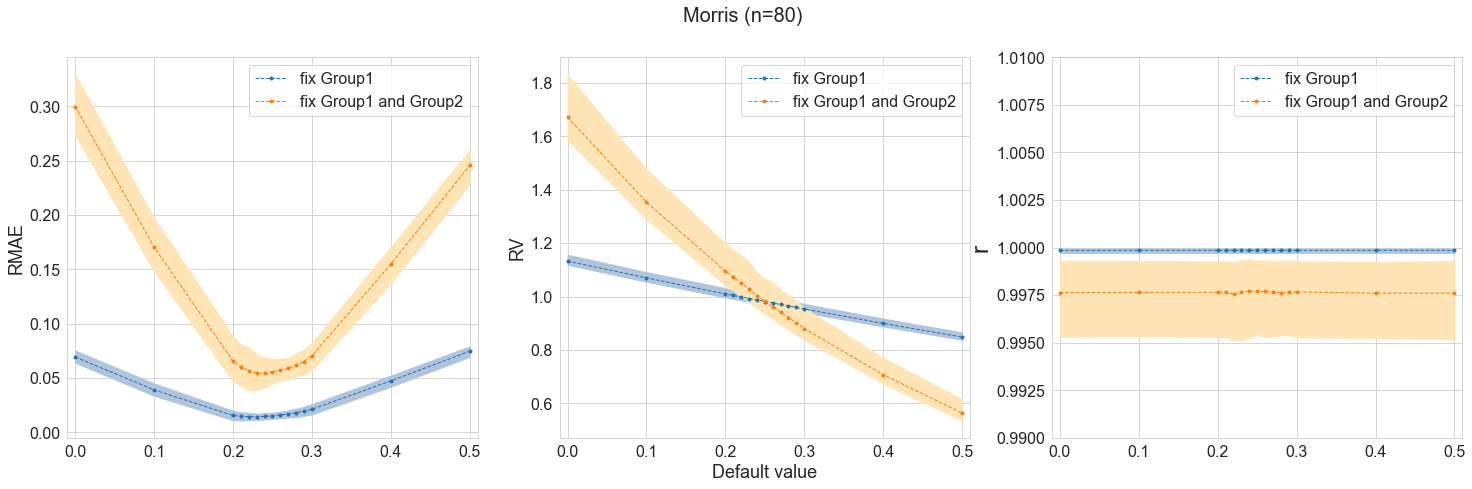

In [57]:

# transform df from dict into dataframe with multiple columns
df = pd.concat(df, axis=1)
df.index = [float(i) for i in df.index]
df=df.astype('float')

def plot_shadow(col_name, ax, ylabel, ylim=None, fs=None):
    df[col_name].plot(kind='line', marker='o', linewidth=1, style='--', ms=3, ax=ax)
    ax.fill_between(df.index, df[f'{col_name}_lower', 'group1'], df[f'{col_name}_upper', 'group1'], color='lightsteelblue')
    ax.fill_between(df.index, df[f'{col_name}_lower', 'group2'], df[f'{col_name}_upper', 'group2'], color='moccasin')
    ax.set_xlim(-0.01, 0.51)
    if not (ylim==None):
        ax.set_ylim(ylim[0], ylim[1])
    ax.tick_params(axis='both', which='major', labelsize=16)
    if fs == None:
        ax.set_ylabel(ylabel, fontsize=18)
    else:
        ax.set_ylabel(ylabel, fontsize=24)    
    ax.legend(['fix Group1', 'fix Group1 and Group2'], fontsize=16)
# End plot_shadow()

sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plot_shadow('mae', axes[0], 'RMAE')
plot_shadow('var', axes[1], 'RV')
fig.suptitle('Morris (n=80)', fontsize=20)
axes[1].set_xlabel('Default value',  fontsize=18)
plot_shadow('ppmc', axes[2], 'r', [0.990, 1.010], 26)

plt.savefig(f'../output/reuse_sample/figure/fig8_evaluate_defaults.png', format='png', dpi=300)
